### Pymacuticals INC
#### Analysis
#### Drug Capomulin is consistently bringing down Tumor growth compared to the other 2 drugs evaluated.
#### Drug Infubinol is better at causing lower metastatic sites compared to other 2 drugs over period of time.
#### Drug Capomulin is consistently causing lower deaths in sample mice population during the 45 day period.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

In [60]:
dfct = pd.read_csv("resources/clinicaltrial_data.csv")
dfct.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [61]:

dfmd = pd.read_csv("resources/mouse_drug_data.csv")

dfmd.head(5)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [62]:
merge_table = pd.merge(dfct, dfmd, how="inner", on="Mouse ID")
merge_table.columns =['MouseID','Timepoint','TumorVolume_mm3','MetastaticSites','Drug']
#merge_table.to_csv("output/merged_clinical_data.csv")
merge_table.head(5)


,MouseID,Timepoint,TumorVolume_mm3,MetastaticSites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


#### Tumor response to treatment

In [63]:
drug_names = merge_table.groupby(['Drug'])['Drug'].unique()
merged_table_by_drug = merge_table.groupby(['Drug','Timepoint']).mean()
merged_table_by_drug['meanValue'] = merged_table_by_drug.groupby(['Drug', 'Timepoint'])['TumorVolume_mm3'].mean()
merged_table_by_drug.head(20)

TumorVolume_mm3  MetastaticSites  meanValue
Drug      Timepoint                                             
Capomulin 0                45.000000         0.000000  45.000000
          5                44.266086         0.160000  44.266086
          10               43.084291         0.320000  43.084291
          15               42.064317         0.375000  42.064317
          20               40.716325         0.652174  40.716325
          25               39.939528         0.818182  39.939528
          30               38.769339         1.090909  38.769339
          35               37.816839         1.181818  37.816839
          40               36.958001         1.380952  36.958001
          45               36.236114         1.476190  36.236114
Ceftamin  0                45.000000         0.000000  45.000000
          5                46.503051         0.380952  46.503051
          10               48.285125         0.600000  48.285125
          15               50.094055         0.789474  50.094055
          20               52.157049         1.111111  52.157049
          25               54.287674         1.500000  54.287674
          30               56.769517         1.937500  56.769517
          35               58.827548         2.071429  58.827548
          40               61.467895         2.357143  61.467895
          45               64.132421         2.692308  64.132421

In [64]:
drug_pivot = pd.pivot_table(merge_table, values=['TumorVolume_mm3'], index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
drug_pivot

TumorVolume_mm3                                              \
Drug            Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                               
0               45.000000  45.000000  45.000000  45.000000  45.000000   
5               44.266086  46.503051  47.062001  47.389175  46.796098   
10              43.084291  48.285125  49.403909  49.582269  48.694210   
15              42.064317  50.094055  51.296397  52.399974  50.933018   
20              40.716325  52.157049  53.197691  54.920935  53.644087   
25              39.939528  54.287674  55.715252  57.678982  56.731968   
30              38.769339  56.769517  58.299397  60.994507  59.559509   
35              37.816839  58.827548  60.742461  63.371686  62.685087   
40              36.958001  61.467895  63.162824  66.068580  65.600754   
45              36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

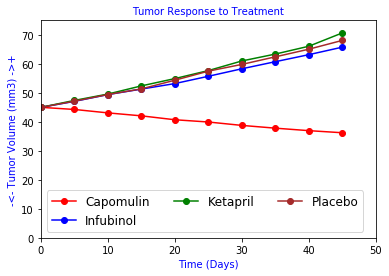

In [65]:
colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black","orange", "pink","purple" ]
drugs = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

y_axis = list(drug_pivot['TumorVolume_mm3']['Capomulin'].values)
x_axis = list(drug_pivot['TumorVolume_mm3']['Capomulin'].index)
#Capomulin = plt.scatter(x_axis,  y_axis, marker="o", color='b',  s=y_axis, alpha=1.0)
Capomulin = plt.errorbar(x_axis,  y_axis, marker="o", color='red', alpha=1.0)


y_axis = list(drug_pivot['TumorVolume_mm3']['Infubinol'].values)
x_axis = list(drug_pivot['TumorVolume_mm3']['Infubinol'].index)
#Infubinol = plt.scatter(x_axis,  y_axis, marker="o",  color='g', s=y_axis, alpha=1.0)
Infubinol = plt.errorbar(x_axis,  y_axis, marker="o",  color='blue', alpha=1.0)



y_axis = list(drug_pivot['TumorVolume_mm3']['Ketapril'].values)
x_axis = list(drug_pivot['TumorVolume_mm3']['Ketapril'].index)
#Ketapril = plt.scatter(x_axis,  y_axis, marker="o",  color='m',  s=y_axis, alpha=1.0)
Ketapril = plt.errorbar(x_axis,  y_axis, marker="o",  color='green', alpha=1.0)


y_axis = list(drug_pivot['TumorVolume_mm3']['Placebo'].values)
x_axis = list(drug_pivot['TumorVolume_mm3']['Placebo'].index)
#Placebo = plt.scatter(x_axis,  y_axis, marker="o",  color='w',  s=y_axis, alpha=1.0)
Placebo = plt.errorbar(x_axis,  y_axis, marker="o",  color='brown', alpha=1.0)


# Set our legend to where the chart thinks is best
#plt.legend(handles=[Capomulin, Infubinol], loc="best")

plt.legend((Capomulin, Infubinol, Ketapril, Placebo),
           ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=12)



plt.xlabel("Time (Days)", fontsize=10, color='blue')
plt.ylabel("-<- Tumor Volume (mm3) ->+", fontsize=10, color='blue')
plt.title("Tumor Response to Treatment", fontsize=10, color='blue')

y_limit = 100
x_iimit = 50
      
plt.ylim(0, 75.0)
plt.xlim(0, 50.0)
plt.show()


#### Metastatic Response to Treatment

In [66]:
drug_meta = pd.pivot_table(merge_table, values=['MetastaticSites'], index=['Timepoint'], columns=['Drug'], aggfunc=np.sum)
drug_meta

MetastaticSites                                               \
Drug            Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Timepoint                                                                
0                       0        0         0        0        0       0   
5                       4        8         7        7        6       9   
10                      8       12        14       13       11      20   
15                      9       15        19       16       18      25   
20                     15       20        21       23       23      29   
25                     18       27        23       31       27      33   
30                     24       31        27       37       31      34   
35                     26       29        20       39       34      37   
40                     29       33        21       41       37      38   
45                     31       35        19       37       33      36   

                                                
Drug      Propriva Ramicane Stelasyn Zoniferol  
Timepoint                                       
0                0        0        0         0  
5                8        3        6         4  
10              13        6       11        11  
15              13        8       18        17  
20              17        8       20        22  
25              19       15       22        27  
30              21       18       25        29  
35              23       20       25        32  
40              25       22       19        39  
45              18       25       19        43

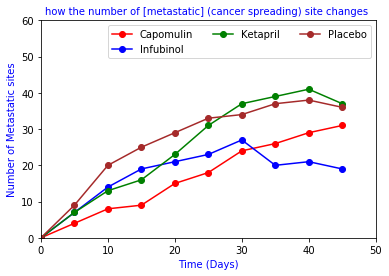

In [67]:
colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black","orange", "pink","purple" ]
drugs = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

y_axis = list(drug_meta['MetastaticSites']['Capomulin'].values)
x_axis = list(drug_meta['MetastaticSites']['Capomulin'].index)
#Capomulin = plt.scatter(x_axis,  y_axis, marker="o", color='b',  s=y_axis, alpha=1.0)
Capomulin = plt.errorbar(x_axis,  y_axis, marker="o", color='red', alpha=1.0)

y_axis = list(drug_meta['MetastaticSites']['Infubinol'].values)
x_axis = list(drug_meta['MetastaticSites']['Infubinol'].index)
#Infubinol = plt.scatter(x_axis,  y_axis, marker="o",  color='g', s=y_axis, alpha=1.0)
Infubinol = plt.errorbar(x_axis,  y_axis, marker="o",  color='blue', alpha=1.0)

y_axis = list(drug_meta['MetastaticSites']['Ketapril'].values)
x_axis = list(drug_meta['MetastaticSites']['Ketapril'].index)
#Ketapril = plt.scatter(x_axis,  y_axis, marker="o",  color='m',  s=y_axis, alpha=1.0)
Ketapril = plt.errorbar(x_axis,  y_axis, marker="o",  color='green', alpha=1.0)

y_axis = list(drug_meta['MetastaticSites']['Placebo'].values)
x_axis = list(drug_meta['MetastaticSites']['Placebo'].index)
#Placebo = plt.scatter(x_axis,  y_axis, marker="o",  color='w',  s=y_axis, alpha=1.0)
Placebo = plt.errorbar(x_axis,  y_axis, marker="o",  color='brown',  alpha=1.0)


# Set our legend to where the chart thinks is best
#plt.legend(handles=[Capomulin, Infubinol], loc="best")

plt.legend((Capomulin, Infubinol, Ketapril, Placebo),
           ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=10)


plt.xlabel("Time (Days)", fontsize=10, color='blue')
plt.ylabel("Number of Metastatic sites", fontsize=10, color='blue')
plt.title("how the number of [metastatic] (cancer spreading) site changes ", fontsize=10, color='blue')

y_limit = 100
x_iimit = 50
      
plt.ylim(0, 60.0)
plt.xlim(0, 50.0)
plt.show()


In [68]:
merge_table.head(5)

,MouseID,Timepoint,TumorVolume_mm3,MetastaticSites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [69]:
survival_count = merge_table.groupby(['Drug','Timepoint']).size()
survival_count[survival_count.index.get_level_values('Drug').isin(['Capomulin'])].values
survival_count[survival_count.index.get_level_values('Drug').isin(['Infubinol'])].values
#survival_count[survival_count.index.get_level_values('Drug').isin(['Ketapril'])].values
#survival_count[survival_count.index.get_level_values('Drug').isin(['Placebo'])].values

array([25, 25, 21, 21, 20, 18, 17, 12, 10,  9], dtype=int64)

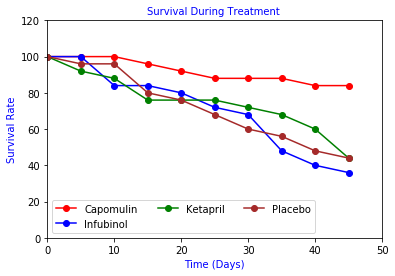

In [70]:
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

survival_count = merge_table.groupby(['Drug','Timepoint']).size()
#print(survival_count)
#survival_count[]
#survival_count.index
                                                    
#survival_count[survival_count.index.get_level_values('Drug').isin(['Capomulin'])].values
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
base_population = 25

y_axis = list(100*(survival_count[survival_count.index.get_level_values('Drug').isin(['Capomulin'])].values/25))
#Capomulin = plt.scatter(x_axis,  y_axis, marker="o", color='b',  s=y_axis, alpha=1.0)
Capomulin = plt.errorbar(x_axis,  y_axis, marker="o", color='red', alpha=1.0)

#print (list(100*(survival_count[survival_count.index.get_level_values('Drug').isin(['Capomulin'])].values/25)))

y_axis = list(100*(survival_count[survival_count.index.get_level_values('Drug').isin(['Infubinol'])].values/25)) 
#Infubinol = plt.scatter(x_axis,  y_axis, marker="o",  color='g', s=y_axis, alpha=1.0)
Infubinol = plt.errorbar(x_axis,  y_axis, marker="o",  color='blue', alpha=1.0)

#print (list(100*(survival_count[survival_count.index.get_level_values('Drug').isin(['Infubinol'])].values/25)))

y_axis = list(100*(survival_count[survival_count.index.get_level_values('Drug').isin(['Ketapril'])].values/25)) 
#Ketapril = plt.scatter(x_axis,  y_axis, marker="o",  color='m',  s=y_axis, alpha=1.0)
Ketapril = plt.errorbar(x_axis,  y_axis, marker="o",  color='green', alpha=1.0)

#print (list(100*(survival_count[survival_count.index.get_level_values('Drug').isin(['Ketapril'])].values/25)))


y_axis = list(100*(survival_count[survival_count.index.get_level_values('Drug').isin(['Placebo'])].values/25))
#Placebo = plt.scatter(x_axis,  y_axis, marker="o",  color='w',  s=y_axis, alpha=1.0)
Placebo = plt.errorbar(x_axis,  y_axis, marker="o",  color='brown', alpha=1.0)

#print (list(100*(survival_count[survival_count.index.get_level_values('Drug').isin(['Placebo'])].values/25)))

 

plt.legend((Capomulin, Infubinol, Ketapril, Placebo),
           ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=10)



plt.xlabel("Time (Days)", fontsize=10, color='blue')
plt.ylabel("Survival Rate", fontsize=10, color='blue')
plt.title("Survival During Treatment ", fontsize=10, color='blue')

y_limit = 120
x_iimit = 50
      
plt.ylim(0, 120.0)
plt.xlim(0, 50.0)
plt.show()



In [71]:
surviving_mice = merge_table.loc[merge_table.Timepoint == 45] 
merge_table_surviving_mice = pd.merge(merge_table, surviving_mice, how="inner", on=["MouseID","Drug"])
merge_table_surviving_mice.loc[ (merge_table_surviving_mice.Drug == 'Capomulin' ) & (merge_table_surviving_mice.MouseID == 'b128')]


,MouseID,Timepoint_x,TumorVolume_mm3_x,MetastaticSites_x,Drug,Timepoint_y,TumorVolume_mm3_y,MetastaticSites_y
0,b128,0,45.000000,0,Capomulin,45,38.982878,2
1,b128,5,45.651331,0,Capomulin,45,38.982878,2
2,b128,10,43.270852,0,Capomulin,45,38.982878,2
3,b128,15,43.784893,0,Capomulin,45,38.982878,2
4,b128,20,42.731552,0,Capomulin,45,38.982878,2
5,b128,25,43.262145,1,Capomulin,45,38.982878,2
6,b128,30,40.605335,1,Capomulin,45,38.982878,2
7,b128,35,37.967644,1,Capomulin,45,38.982878,2
8,b128,40,38.379726,2,Capomulin,45,38.982878,2
9,b128,45,38.982878,2,Capomulin,45,38.982878,2


In [72]:
surviving_mice = merge_table.loc[merge_table.Timepoint == 45]
surviving_mice.head(5)
surviving_mice = list(surviving_mice['MouseID'].values)
df_surviving = merge_table[merge_table['MouseID'].isin(surviving_mice)]
df_surviving.head(5)

,MouseID,Timepoint,TumorVolume_mm3,MetastaticSites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [73]:
drug_meta = pd.pivot_table(merge_table, values=['TumorVolume_mm3'], index=['Timepoint'], columns=['Drug'], aggfunc=np.mean)
drug_meta.head(5)

TumorVolume_mm3                                              \
Drug            Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                               
0               45.000000  45.000000  45.000000  45.000000  45.000000   
5               44.266086  46.503051  47.062001  47.389175  46.796098   
10              43.084291  48.285125  49.403909  49.582269  48.694210   
15              42.064317  50.094055  51.296397  52.399974  50.933018   
20              40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

#### Summary Bar Graph

[-19.475302667894159, 46.123471727851836, 57.028794686606041, 51.297960483151527]


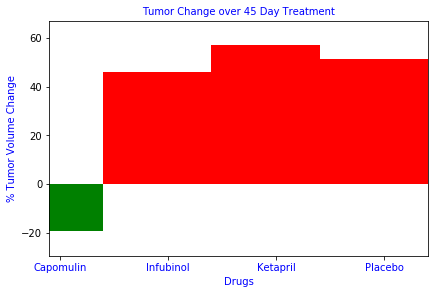

In [77]:
y_axis = []
y_axis.append(100*(drug_meta['TumorVolume_mm3']['Capomulin'].iloc[-1] - drug_meta['TumorVolume_mm3']['Capomulin'].iloc[0])/drug_meta['TumorVolume_mm3']['Capomulin'].iloc[0])
y_axis.append(100*(drug_meta['TumorVolume_mm3']['Infubinol'].iloc[-1] - drug_meta['TumorVolume_mm3']['Infubinol'].iloc[0])/drug_meta['TumorVolume_mm3']['Capomulin'].iloc[0])
y_axis.append(100*(drug_meta['TumorVolume_mm3']['Ketapril'].iloc[-1] - drug_meta['TumorVolume_mm3']['Ketapril'].iloc[0])/drug_meta['TumorVolume_mm3']['Capomulin'].iloc[0])
y_axis.append(100*(drug_meta['TumorVolume_mm3']['Placebo'].iloc[-1] - drug_meta['TumorVolume_mm3']['Placebo'].iloc[0])/drug_meta['TumorVolume_mm3']['Capomulin'].iloc[0])

x_axis = [0,1,2,3]
x=0
print(y_axis)
#plt.bar(i, data['height'],align='center',color=data['color'])

plt.bar(0, y_axis[0], facecolor='green', alpha=1.0, align="center",width=1.0)
plt.bar(1, y_axis[1], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(2, y_axis[2], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(3, y_axis[3], facecolor='red', alpha=1.0, align="center",width=1.0)
tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"], fontsize=10, color='blue')


plt.xlim(0, 3.5)
plt.ylim(min(y_axis)-10, max(y_axis)+10)

plt.title("Tumor Change over 45 Day Treatment", fontsize=10, color='blue')
plt.xlabel("Drugs", fontsize=10, color='blue')
plt.ylabel("% Tumor Volume Change", fontsize=10, color='blue')
plt.tight_layout(pad=0.4, w_pad=0.01, h_pad=1.0)
plt.show()

In [75]:
#My Plan to caluclate %Tumor reduction per mouse ..abandoned..
#df_surviving['Change'] = df_surviving.TumorVolume_mm3.pct_ change()
#df_surviving.set_index('Drug','MouseID','Timepoint')
#df_surviving['pct'] = df_surviving.groupby(['Timepoint','Drug','MouseID']).TumorVolume_mm3.pct_change()
d1 = df_surviving.set_index(['Timepoint','Drug', 'MouseID']).TumorVolume_mm3.unstack(['Drug', 'MouseID'])
d1.index
d1.columns
#d1.values
abc  = d1.pct_change()
type(abc)
abc.head(5)
#abc.columns.tolist()
#abc['Capomulin','b128']
#Timepoint
#0    NaN
#5    0.0144474

#abc.groupby(['Capomulin'],['Timeperiod']).mean()

#d1['Drug']['MouseID']['pct'] = d1.pct_change()

#d1.head()
#d1.head(5)
#df_surviving.to_csv("output/merged_clinical_data_surviving_mouse.csv")
#Verified only surviving mouses 

#type(surviving_mice)

Drug      Capomulin  Ketapril            Naftisol  Ketapril  Naftisol  \
MouseID        b128      h246      p189      b559      y260      z969   
Timepoint                                                               
0               NaN       NaN       NaN       NaN       NaN       NaN   
5          0.014474  0.099343  0.089971  0.053553  0.039996  0.096289   
10        -0.052145  0.038375  0.051652  0.013215  0.027393  0.067360   
15         0.011880  0.093743  0.040583  0.069581  0.043974  0.039063   
20        -0.024057  0.031176  0.053184  0.083217  0.010627  0.058227   

Drug                                                 ...    Capomulin  \
MouseID        r604      n304      l700      l725    ...         i738   
Timepoint                                            ...                
0               NaN       NaN       NaN       NaN    ...          NaN   
5          0.045950  0.031805  0.020408  0.083029    ...     0.013237   
10         0.036518  0.016584  0.023851  0.042834    ...    -0.047695   
15         0.046897  0.027049  0.043108  0.067304    ...    -0.125336   
20         0.016216  0.015993  0.034554  0.099007    ...     0.014544   

Drug                                                                   \
MouseID        r944      y793      g316      g288      l897      t565   
Timepoint                                                               
0               NaN       NaN       NaN       NaN       NaN       NaN   
5          0.016381 -0.088446 -0.021717  0.018653  0.010272  0.019903   
10         0.017648  0.014873  0.010887  0.010135  0.015232  0.018593   
15         0.017814  0.015702  0.016060 -0.089230 -0.045352 -0.049371   
20        -0.087554 -0.037065  0.015848  0.018610  0.017057 -0.120851   

Drug                                     
MouseID        i557      m957      m601  
Timepoint                                
0               NaN       NaN       NaN  
5         -0.060852  0.013831 -0.079809  
10         0.017283  0.017363 -0.110683  
15         0.012509 -0.142414 -0.036952  
20         0.010063 -0.022488 -0.034087  

[5 rows x 130 columns]